<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>



# **Final Project: Boston Housing**


##### Estimated time needed: **60** minutes


#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [5]:
print(boston_df.head(5))

   Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0           0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1           1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2           2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3           3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4           4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   

     TAX  PTRATIO  LSTAT  MEDV  
0  296.0     15.3   4.98  24.0  
1  242.0     17.8   9.14  21.6  
2  242.0     17.8   4.03  34.7  
3  222.0     18.7   2.94  33.4  
4  222.0     18.7   5.33  36.2  


In [7]:
print(boston_df.dtypes)

Unnamed: 0      int64
CRIM          float64
ZN            float64
INDUS         float64
CHAS          float64
NOX           float64
RM            float64
AGE           float64
DIS           float64
RAD           float64
TAX           float64
PTRATIO       float64
LSTAT         float64
MEDV          float64
dtype: object


In [10]:
print(boston_df.isnull())

     Unnamed: 0   CRIM     ZN  INDUS   CHAS    NOX     RM    AGE    DIS  \
0         False  False  False  False  False  False  False  False  False   
1         False  False  False  False  False  False  False  False  False   
2         False  False  False  False  False  False  False  False  False   
3         False  False  False  False  False  False  False  False  False   
4         False  False  False  False  False  False  False  False  False   
..          ...    ...    ...    ...    ...    ...    ...    ...    ...   
501       False  False  False  False  False  False  False  False  False   
502       False  False  False  False  False  False  False  False  False   
503       False  False  False  False  False  False  False  False  False   
504       False  False  False  False  False  False  False  False  False   
505       False  False  False  False  False  False  False  False  False   

       RAD    TAX  PTRATIO  LSTAT   MEDV  
0    False  False    False  False  False  
1    False  F

In [14]:
print(boston_df.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
501    False
502    False
503    False
504    False
505    False
Length: 506, dtype: bool


In [15]:
print(boston_df.corr())

            Unnamed: 0      CRIM        ZN     INDUS      CHAS       NOX  \
Unnamed: 0    1.000000  0.407407 -0.103393  0.399439 -0.003759  0.398736   
CRIM          0.407407  1.000000 -0.200469  0.406583 -0.055892  0.420972   
ZN           -0.103393 -0.200469  1.000000 -0.533828 -0.042697 -0.516604   
INDUS         0.399439  0.406583 -0.533828  1.000000  0.062938  0.763651   
CHAS         -0.003759 -0.055892 -0.042697  0.062938  1.000000  0.091203   
NOX           0.398736  0.420972 -0.516604  0.763651  0.091203  1.000000   
RM           -0.079971 -0.219247  0.311991 -0.391676  0.091251 -0.302188   
AGE           0.203784  0.352734 -0.569537  0.644779  0.086518  0.731470   
DIS          -0.302211 -0.379670  0.664408 -0.708027 -0.099176 -0.769230   
RAD           0.686002  0.625505 -0.311948  0.595129 -0.007368  0.611441   
TAX           0.666626  0.582764 -0.314563  0.720760 -0.035587  0.668023   
PTRATIO       0.291074  0.289946 -0.391679  0.383248 -0.121515  0.188933   
LSTAT       

In [16]:
print(boston_df.describe)

<bound method NDFrame.describe of      Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0             0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1             1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2             2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3             3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4             4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   
..          ...      ...   ...    ...   ...    ...    ...   ...     ...  ...   
501         501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0   
502         502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0   
503         503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0   
504         504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0   
505         505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0   

     

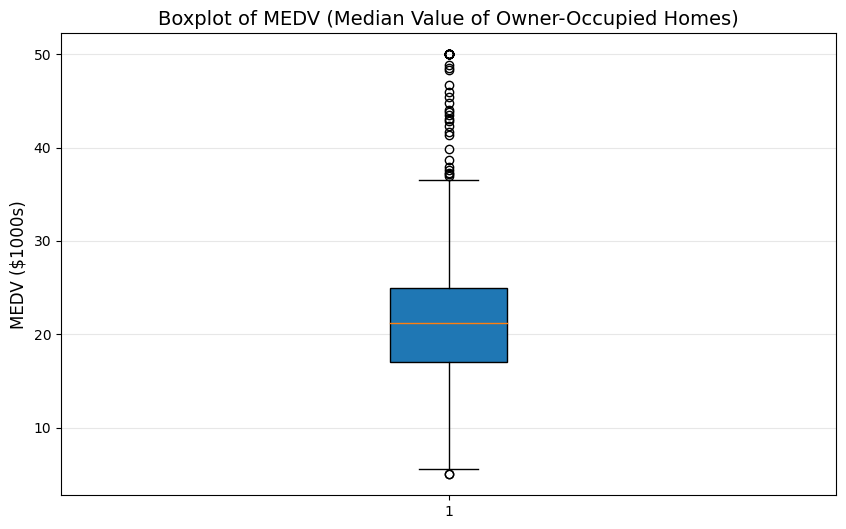

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.boxplot(boston_df['MEDV'], vert=True, patch_artist=True)
plt.title('Boxplot of MEDV (Median Value of Owner-Occupied Homes)', fontsize=14)
plt.ylabel('MEDV ($1000s)', fontsize=12)
plt.grid(axis='y', alpha=0.3)

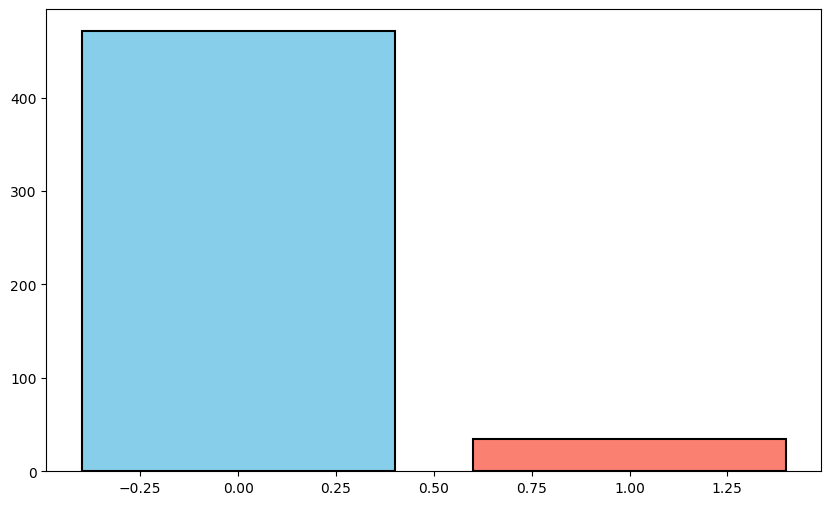

In [19]:
plt.figure(figsize=(10, 6))

# Count the values for CHAS
chas_counts = boston_df['CHAS'].value_counts().sort_index()

# Create bar plot
bars = plt.bar(chas_counts.index, chas_counts.values, 
               color=['skyblue', 'salmon'], edgecolor='black', linewidth=1.5)


In [20]:
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], 
                                 bins=3, 
                                 labels=['New: <35 years', 'Middle: 35-70 years', 'Old: >70 years'])

# Alternative: Create specific age groups with custom boundaries for better interpretation
# Using more meaningful cutoffs based on housing age distribution
print("AGE Statistics:")
print(boston_df['AGE'].describe())
print("\nAge distribution percentiles:")
print(f"33rd percentile: {boston_df['AGE'].quantile(0.33):.1f} years")
print(f"67th percentile: {boston_df['AGE'].quantile(0.67):.1f} years")

# Create custom age groups based on percentiles for more balanced groups
age_33 = boston_df['AGE'].quantile(0.33)
age_67 = boston_df['AGE'].quantile(0.67)

boston_df['AGE_GROUP_CUSTOM'] = pd.cut(boston_df['AGE'], 
                                        bins=[0, age_33, age_67, 100], 
                                        labels=[f'New: <{age_33:.0f} years', 
                                                f'Middle: {age_33:.0f}-{age_67:.0f} years', 
                                                f'Old: >{age_67:.0f} years'])


AGE Statistics:
count    506.000000
mean      68.574901
std       28.148861
min        2.900000
25%       45.025000
50%       77.500000
75%       94.075000
max      100.000000
Name: AGE, dtype: float64

Age distribution percentiles:
33rd percentile: 56.1 years
67th percentile: 90.3 years


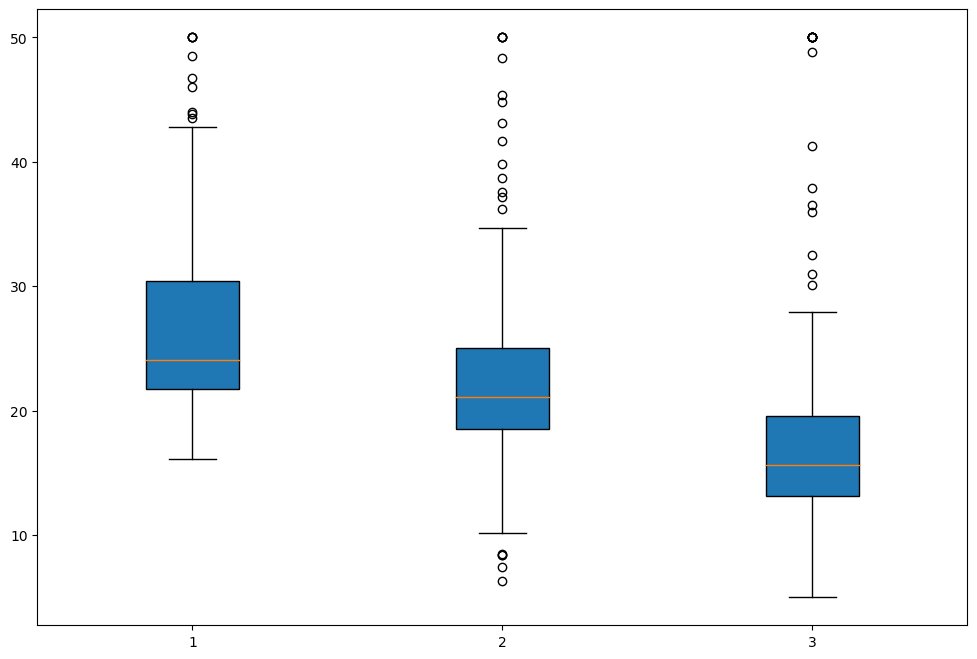

In [21]:
plt.figure(figsize=(12, 8))

# Prepare data for boxplot
age_groups = boston_df['AGE_GROUP_CUSTOM'].cat.categories
data_by_group = [boston_df[boston_df['AGE_GROUP_CUSTOM'] == group]['MEDV'] for group in age_groups]

# Create boxplot
box = plt.boxplot(data_by_group, patch_artist=True, vert=True)


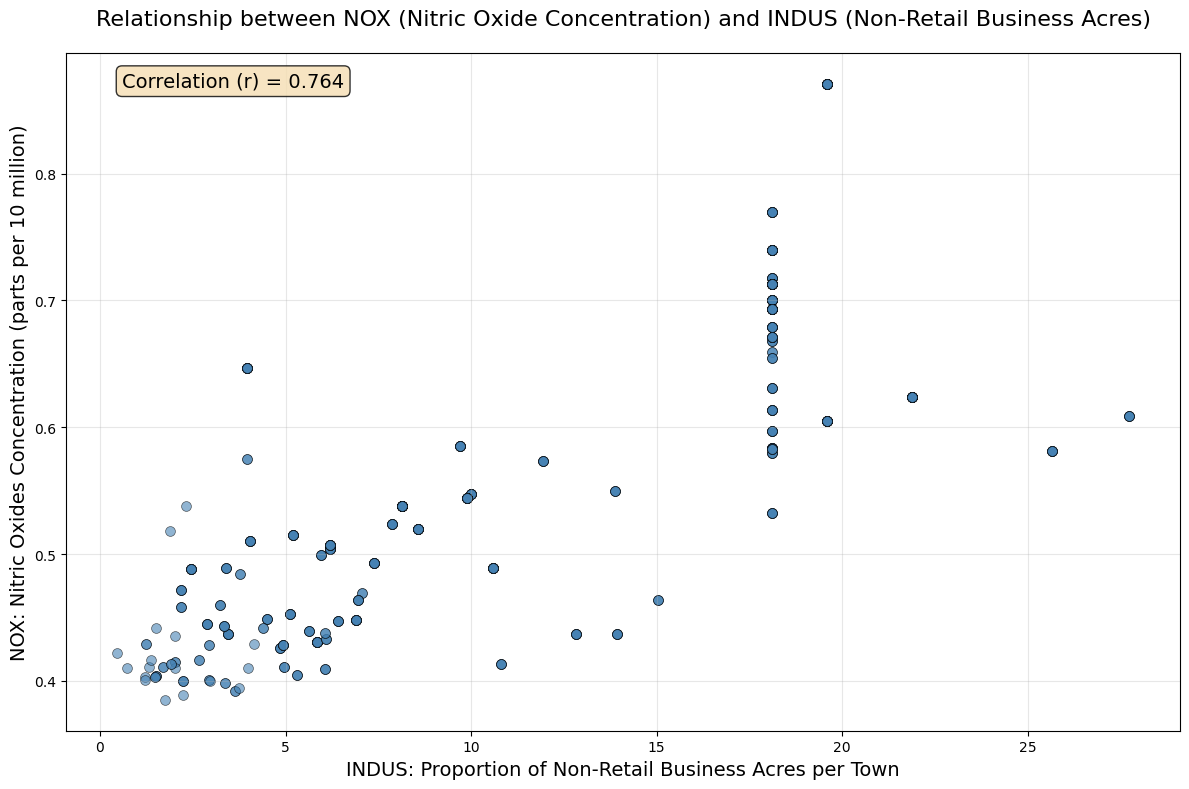

In [22]:
plt.figure(figsize=(12, 8))

# Create scatter plot
plt.scatter(boston_df['INDUS'], boston_df['NOX'], 
            alpha=0.6, s=50, c='steelblue', edgecolors='black', linewidth=0.5)

# Add title and labels
plt.title('Relationship between NOX (Nitric Oxide Concentration) and INDUS (Non-Retail Business Acres)', 
          fontsize=16, pad=20)
plt.xlabel('INDUS: Proportion of Non-Retail Business Acres per Town', fontsize=14)
plt.ylabel('NOX: Nitric Oxides Concentration (parts per 10 million)', fontsize=14)

# Add grid
plt.grid(alpha=0.3)

# Add correlation coefficient
correlation = boston_df['INDUS'].corr(boston_df['NOX'])
plt.text(0.05, 0.95, f'Correlation (r) = {correlation:.3f}', 
         transform=plt.gca().transAxes, fontsize=14,
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

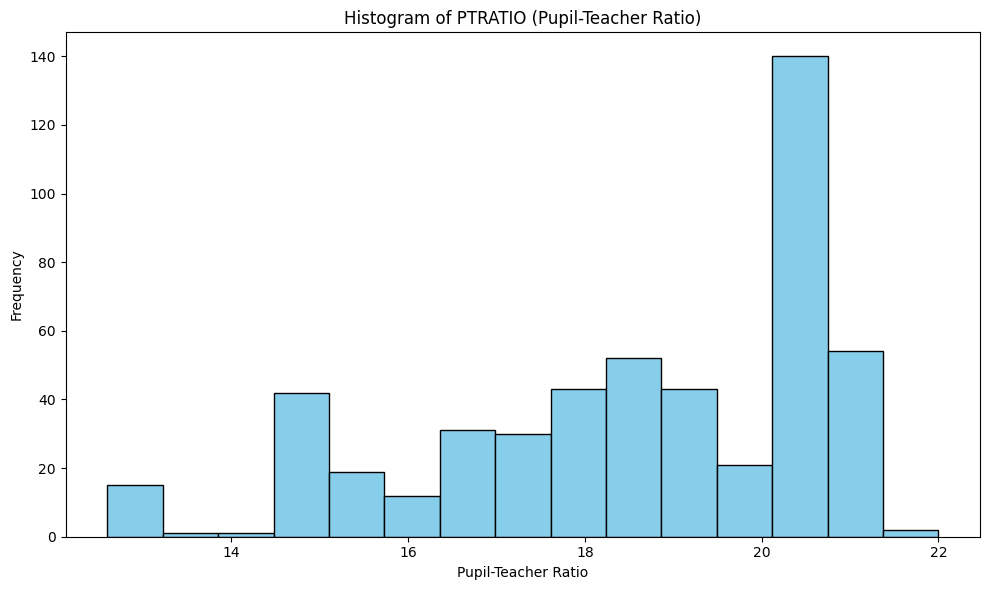

In [24]:
# Create a simple histogram for PTRATIO
plt.figure(figsize=(10, 6))

# Create histogram
plt.hist(boston_df['PTRATIO'], bins=15, color='skyblue', edgecolor='black')

# Add title and labels
plt.title('Histogram of PTRATIO (Pupil-Teacher Ratio)')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [25]:
from scipy.stats import levene

# Split MEDV into two groups based on CHAS value
medv_chas0 = boston_df[boston_df['CHAS'] == 0]['MEDV']
medv_chas1 = boston_df[boston_df['CHAS'] == 1]['MEDV']

# Perform Levene's test
statistic, p_value = levene(medv_chas0, medv_chas1)

# Print the results
print(f"Levene's Test Results:")
print(f"Test Statistic: {statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
print(f"\nInterpretation:")
if p_value < 0.05:
    print("The variances are NOT equal (p < 0.05)")
else:
    print("The variances ARE equal (p >= 0.05)")

Levene's Test Results:
Test Statistic: 4.5903
P-value: 0.0326

Interpretation:
The variances are NOT equal (p < 0.05)


In [26]:
from scipy.stats import ttest_ind

# Split MEDV into two groups based on CHAS value
medv_chas0 = boston_df[boston_df['CHAS'] == 0]['MEDV']  # Not bounded by river
medv_chas1 = boston_df[boston_df['CHAS'] == 1]['MEDV']  # Bounded by river

# Perform independent T-test
t_statistic, p_value = ttest_ind(medv_chas0, medv_chas1)

# Print the results
print(f"T-test Results:")
print(f"T-statistic: {t_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
print(f"\nInterpretation:")
if p_value < 0.05:
    print("There IS a significant difference in MEDV (p < 0.05)")
    print(f"Mean MEDV (not bounded): ${medv_chas0.mean():.2f}K")
    print(f"Mean MEDV (bounded): ${medv_chas1.mean():.2f}K")
else:
    print("There is NO significant difference in MEDV (p >= 0.05)")

T-test Results:
T-statistic: -3.9964
P-value: 0.0001

Interpretation:
There IS a significant difference in MEDV (p < 0.05)
Mean MEDV (not bounded): $22.09K
Mean MEDV (bounded): $28.44K


In [27]:
from scipy.stats import f_oneway

# Get the MEDV values for each AGE group (using the AGE_GROUP_CUSTOM created earlier)
medv_new = boston_df[boston_df['AGE_GROUP_CUSTOM'] == 'New: <35 years']['MEDV']
medv_middle = boston_df[boston_df['AGE_GROUP_CUSTOM'] == 'Middle: 35-70 years']['MEDV']
medv_old = boston_df[boston_df['AGE_GROUP_CUSTOM'] == 'Old: >70 years']['MEDV']

# Perform ANOVA
f_statistic, p_value = f_oneway(medv_new, medv_middle, medv_old)

# Print the results
print(f"ANOVA Test Results:")
print(f"F-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
print(f"\nInterpretation:")
if p_value < 0.05:
    print("There IS a significant difference in MEDV among the AGE groups (p < 0.05)")
    print(f"Mean MEDV (New): ${medv_new.mean():.2f}K")
    print(f"Mean MEDV (Middle): ${medv_middle.mean():.2f}K")
    print(f"Mean MEDV (Old): ${medv_old.mean():.2f}K")
else:
    print("There is NO significant difference in MEDV among the AGE groups (p >= 0.05)")

<ipython-input-27-0aa48b33ab5a>:9: DegenerateDataWarning: at least one input has length 0
  f_statistic, p_value = f_oneway(medv_new, medv_middle, medv_old)


ANOVA Test Results:
F-statistic: nan
P-value: nan

Interpretation:
There is NO significant difference in MEDV among the AGE groups (p >= 0.05)
